In [2]:
print("im working")

im working


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as ply

In [4]:
df=pd.read_csv('telecom_churn.csv')
df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


In [5]:
df.describe()
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [6]:
df[df['Churn'] == 1].head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
10,1,65,1,0,0.29,4,129.1,137,44.9,11.43,12.7
15,1,161,1,0,0.00,4,332.9,67,84.0,15.89,5.4
21,1,77,1,0,0.00,5,62.4,89,26.0,8.50,5.7
33,1,12,1,0,0.00,1,249.6,118,64.0,12.62,11.8
41,1,135,0,1,3.94,0,173.1,85,86.4,10.20,14.6
48,1,119,1,0,0.00,5,159.1,114,47.0,11.57,8.8
54,1,87,1,0,0.00,5,151.0,83,45.0,10.99,9.7
57,1,121,1,1,1.57,3,198.4,129,56.7,3.77,5.8
69,1,150,1,0,0.00,4,178.9,101,45.0,8.46,13.8
76,1,82,1,0,0.21,0,300.3,109,69.1,9.05,11.7


Churn
0    2850
1     483
Name: count, dtype: int64


C:\Users\ishap\AppData\Local\Temp\ipykernel_16916\2162458895.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


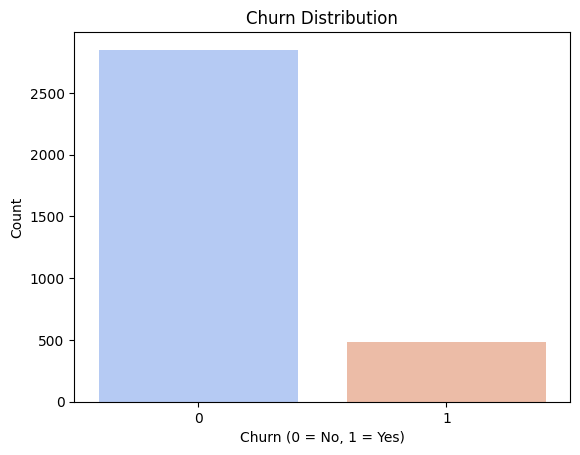

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(['Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.94


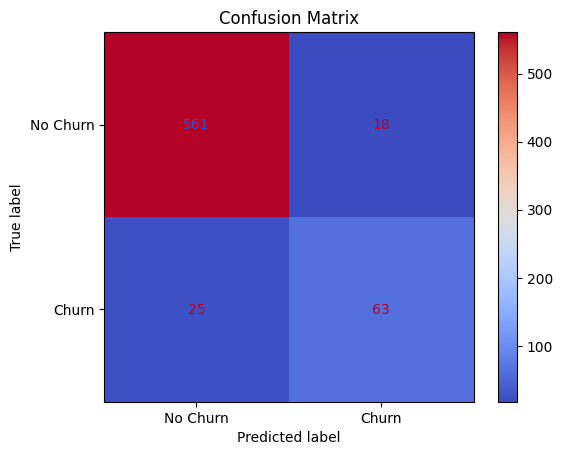

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot(cmap="coolwarm")
plt.title('Confusion Matrix')
plt.show()